In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy
import seaborn

seaborn.set(style='whitegrid', palette='colorblind')

filename = 'cosmic_rays_clean.csv'

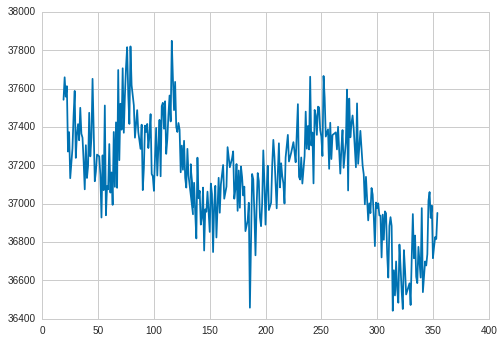

In [67]:
data = numpy.loadtxt(filename, delimiter=',')
time = data[:, 0]
counts = data[:, 1]

plt.plot(time, counts)
plt.show()

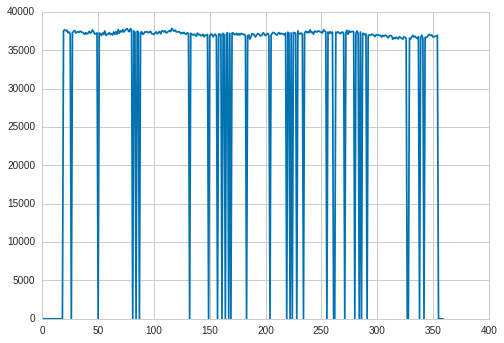

In [68]:
full_time = numpy.arange(360)
full_data = numpy.zeros_like(full_time)
for t, c in zip(time, counts):
    full_data[int(t)] = c

# print(full_time.shape, full_data.shape)
plt.plot(full_time, full_data)
plt.show()

In [69]:
day = numpy.arange(24)
folded = full_data.reshape((-1, 24))

folded

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0, 37542, 37659, 37558, 37613, 37272],
       [37373, 37133,     0, 37288, 37458, 37588, 37239, 37361, 37415,
        37331, 37500, 37365, 37344, 37222, 37075, 37305, 37134, 37197,
        37474, 37247, 37344, 37651, 37390, 37117],
       [37167, 37256,     0, 37247, 37151, 36928, 37252, 37071, 37512,
        36940, 37092, 37075, 37311, 37058, 37163, 36994, 37374, 37088,
        37424, 37083, 37697, 37227, 37521, 37386],
       [37706, 37370, 37563, 37714, 37816, 37567, 37416, 37820, 37618,
            0, 37513, 37344,     0, 37488, 37374,     0, 37286, 37412,
        37071, 37185, 37407, 37374, 37416, 37290],
       [37357, 37467, 37155, 37143, 37067, 37248, 37395, 37147, 37294,
        37437, 37143, 37509, 37526, 37391, 37534, 37260, 37336, 37463,
        37564, 37429, 37849, 37656, 37488, 37635],
       [37400, 37374, 37421, 37386,

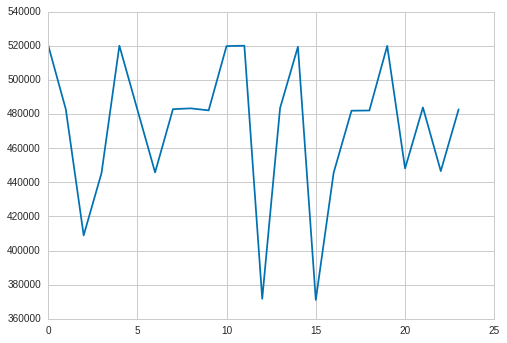

In [70]:
plt.plot(day, folded.sum(axis=0))
plt.show()

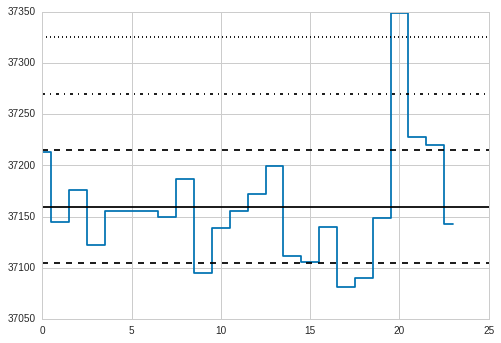

In [78]:
summed = folded.sum(axis=0)

entries = numpy.where(folded > 0, True, False).sum(axis=0)
normalized = summed/entries

mean = normalized.mean()
std = normalized.std(ddof=0)

plt.plot(day, normalized, linestyle='steps-mid')
plt.axhline(mean, color='k', linestyle='-')
plt.axhline(mean + std, color='k', linestyle='--')
plt.axhline(mean - std, color='k', linestyle='--')
plt.axhline(mean + 2 * std, color='k', linestyle='-.')
plt.axhline(mean + 3 * std, color='k', linestyle=':')
plt.show()

So, we have a $>3\sigma$ detection of something. Maybe some of the other features mean something, but really this is the only feature people should find.